# Machine Learning (metodos supervisados, no supervisados, semi-supervisados, re-enforzados, estos ultimos no se ven en este curso)


## Metodos supervisados
Los metodos supervisasdos requieren "labels" (las "respuestas" a las preguntas). Estas "respuestas" son la forma en que se **supervisa** el metodo.

Ej: La ensenanza de animales a un nino. Se le presenta un juego de loteria con cartas. Pero por carta se le dice el nombre del animal "jirafa, elefante, gato, etc". Estos nombres son las etiquetas. El ninho se puede entrenar con el 70% de las cartas, donde se le dice el nombre de cada animal. Se puede usar un 30% para probarlo.

Dentro de los metodos supervisados estan.

* Regresion lineal (esta clase)
* Regresion logisitica (pronto)
* SVM: Support Vector Machines ( mas adelante)
* Arboles de decision (decision trees). No lo cubrimos en este curso
* Arboles aleatorios (random forest)
* Redes neuronales (ANN: Artificial Neural networks. Mas adelante).

### Regresion Lineal
Matematicamente, vamos a ver que este problema se formula con la ecuacion

$$X \theta = y . \tag{1}$$
$X$ es la matriz de datos. Hay $m$ datos y cada dato tiene $m$ parametros (**features**, caracteristicas). Es decir $X \in \mathbb{R}^{m \times n}.$

$\theta$ es el parametro mas importante en ML. Este es el que se **aprende**.

Veamos como resulta el sistema (1).


Asumamos que queremos vender nuestra casa de 1000 pies$^2$.  Queremos usar
ML para, con los precios de las casas en mi ciudad, yo pueda estimar un precio de mi casa. En este promblema el **precio** es la etiqueta. (de ahi que es supervisado). En la Ecuacion (1) es $y$

Los **features**
son por ejemplo

* Area de la casa
* El numero de habitaciones
* El estrato
* Cercania a lugares de trabajo
* Arquitectura (disnho).
* Materiales de construccion
* etc

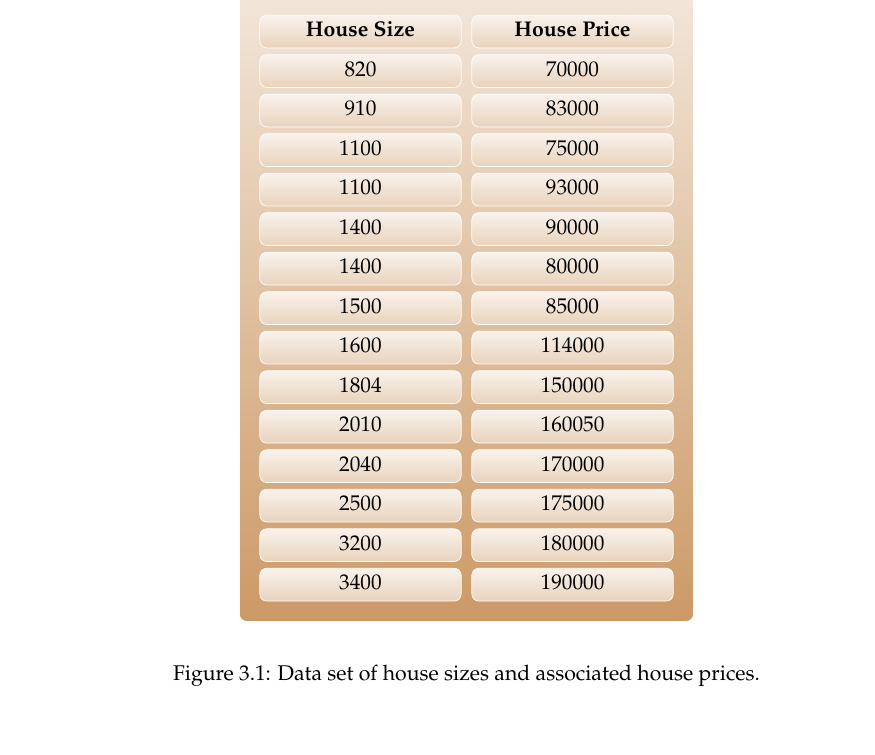

Por simplicidad asumimos un modelo lineal con un solo "feature" (area) y el parametro a aprender es


$$\theta = \binom{\theta_0}{\theta_1} .$$
donde $\theta_0$ es el intercepto y $\theta_1$.

En este sentido, por cada casa $i=1,2, \cdots, m$
tenemos


\begin{eqnarray}
y_1 &=& \theta_0 + \theta_1 x_1 \\
y_2 &=& \theta_0 + \theta_1 x_2 \\
&\vdots& \\
y_m &=& \theta_0 + \theta_1 x_m
\end{eqnarray}
Esto se puede escribir de forma matricial.



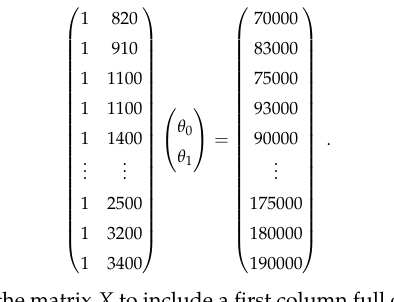

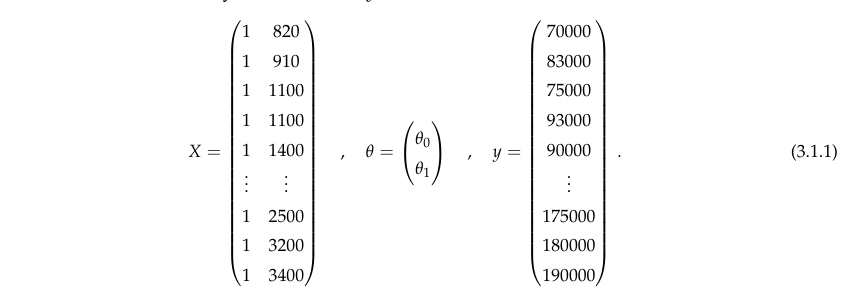

Vamos a revisar el problema de **minimos cuadrados** como parte de la regresion lineal.

De la Ecuacion $X \theta = y$, tenemos que la componente $i$

$$ y_i - x_i^T \theta = error_i .$$
Queremos minimizar el error. Como el error tiene signo, es mejor usarlo en valor absoluto o al cuadrado.
Podemos pensar en $ \sum_i | error_i |$, sin embargo vamos a tener en cuenta por elmomento la suma de cuadrados.


$$ \sum_{i=1}^m (y_i - x_i^T \theta)^2 =\| X \theta - y \|^2 .$$


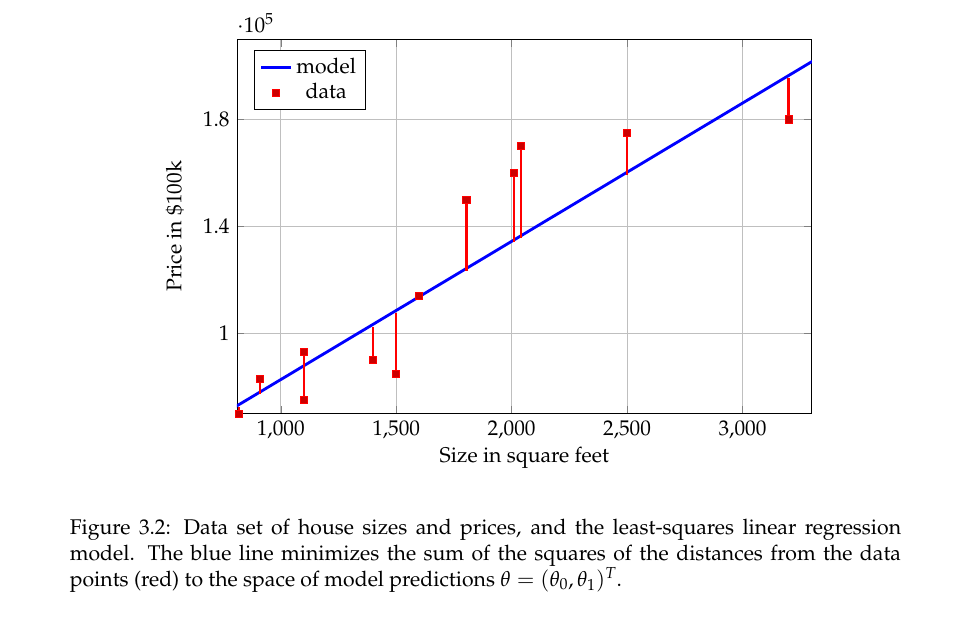

Queremos resolver

$$ X \theta = y .$$
para $\theta$. Es posible que $X$ ni siquiera tenga inversa.

El primer esfuerzo para resolver este problema es usando las ecuaciones normales

$$ X^T X \theta = X^T y.$$
Estamos resolviendo $A \theta = b$.
Cuando el problema es de regresion como el de arriba, no necesita regularizacion.

Usando `Python` encontramos que


$$A = X^T X = \begin{pmatrix} 14 & 24784 \\ 24784 & 52156616\end{pmatrix} .$$

Esta matriz es invertible y su inversa es


$$ \begin{pmatrix} 4.49e-01 & -2.1375e-04 \\ -2.1375e-04 & 1.2075e-07 \end{pmatrix} .$$

El termino de la derecha lo llamos $b=X^T y$


$$ b = \binom{1.715e+06}{3.4642e+09}. $$


De forma que $\theta = A^{-1}b = (X^T X)^{-1} X^T y .$
Esto da como resultado.


\begin{eqnarray}
\theta_0 &=& 30994.74  \\
\theta_1 &=& 51.69
\end{eqnarray}

La pregunta, por cuanto vendo mi casa?

$$y = \theta_0 + \theta_1 x  = 30994.74 + 51.69*1000$$





El precio de mi casa seria de $82648.74

### Metodos de gradiente.

Recuerden cuando estudiamos calculo matricial y queriamos minimizar (minimos cuadrados ) $J = \| X \theta - y \|^2$. Encontramos que el gradiente de $J$
es

$$ \nabla_{\theta} J = X^T X \theta - X^T y .$$
Si igualamos a 0, es decir $\nabla_{\theta} J = 0$  entonces
encontramos la ecuaciones normales.


$$X^T X \theta = X^T y .$$

El gradiente lo vamos a usar para resolver problema de minimizacion continua, donde se plantea una funcion objetivo $J=J(\theta)$.
Los metodos de gradiente, que explicamos a continuacion tienen ventajas.
Las desventajas de la solucion por ecuaciones normales son:

* Es lento para matrices grandes, a parte de que requiere mucha memoria.
* El problema de las ecuaciones normales es lineal y no generaliza al mundo real.

Voy a hacer un alto para discutir de nuevo el problema $A \theta = b$.

En general hay dos tipos de metodos para resolver este problema.

* Metodos estacionarios. La matriz $A$ no se altera, se descompone en tres partes
$A= L + D + U$, y dependiendo de que parte se mueva a la derecha se forman problemas de punto fijo ($f(x)=x$) y esto son:
    * Jacobi (iterations)
    * Gauss-Seidel
    * succesive over-relaxation


* Metodos no estacionarios: La matriz $A$ se altera. Aca es donde resultan los metodos basados en gradiente, como Conjugate Gradient (Gradiente conjugado), Steepest Descent (descenso maximo) y por ejemplo GMRES: Generalized minimum residual method.

Generalizando un poco (incluimos otras tecnicas)

* Simulating Annealing: Este es bueno para encontrar el minimo global. Funciona con ecuacones no lineales.
* Pattern search: Este, como el anterior no requieren de la derivada (gradiente). Se usa en ANN. Referencia en las notas.
* Metodos de Newton.  En general, los metodos de Newton requieren la segunda derivada (Hessiana) y esta es muy costosa, entonces
* L-BFGS viene al rescate. $L$ limited memory, Broyden, Fletcher, Goldfarb, Shanno. Esta es una aproximacion donde la Hessiana se aproxima en su diagonal y es bastante buena dadas las limitaciones.

* Existen otros algoritmos llamados **evolutivos**. Por ejemplo
    * particle swarm optimization
    * genetic algorithms.
    Estos algoritmos son buenos para encontrar el maximo global pero son lentos y no se usan mucho para ML.

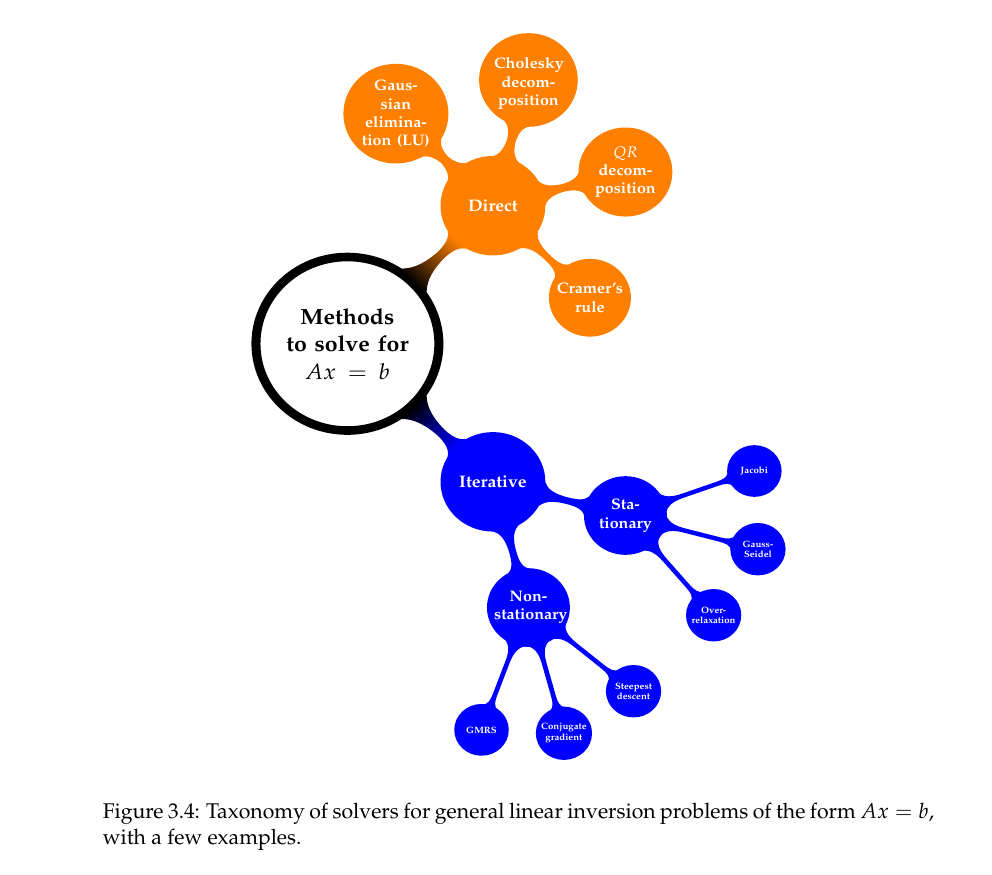

### Metodos de descenso con gradiente (gradient descent)

* Steepest Descent (SD): Maximo descenso. El metodo es analitico para ecuaciones lineales que se resuelven con una funcion objetivo cuadratica. Pero no es muy rapido.

* Conjugate Gradient(CG): Es muy rapido pero solo resuelve ecuaciones del tipo $A \theta = b$.

* Non-linear CG: Esta extension del anterior para problemas no lineales. Por ejemplo el metodo L-BFGS

* Stochastic Gradient Descent: Descenso con gradiente estocastico. Es muy rapido, se usa en ANN, tiene bajo coeficiente costo-beneficio.



Seamos un poco mas cuantitativos.

Definimos la **hipotesis**. $X \theta$ es la hipotesis $h$

En general los problemas de optimizacion de ML se formulan mediante una funcion de costo (target function, loss function,  etc.)


$$ J = \frac12 \| X \theta - y \|^2 = \frac12 \| h(\theta, x) - y \|^2 = \frac12 \sum_{i=1}^m ( h(\theta, x^{(i)}) - y_i)^2 .$$
donde $x^{(i)}$ es la fila $i$ de la matriz de datos $X$.

Sacando la derivada de $J$ (el gradiente). Recuerde
$h(\theta, x^{(i)}) = x^{(i)} \theta$


$$\frac{\partial J}{\partial \theta_k} = \sum_{i=1}^m (h(\theta, x^{(i)}) - y_i) x_{ik}  .$$


Veamos que el gradiente es la direccion de maximo ascenso.

De CVV
$$ \frac{\partial J}{\partial u} = \nabla J \cdot u = \langle \nabla J , u \rangle   .$$
donde $u$ es un vector unitario.


$ \nabla J \cdot u = \| \nabla J \| \cos \beta  .$, donde $u$ es un vector unitario,  y $\beta$ es el angulo entre $\nabla J$ y $u$. Entonces
cuando es maximo $\cos \theta$, cuando $\theta=0$. O sea cuando $u$ esta
**alineado** con el gradiente de $J$ es decir cuando $\nabla J$ y $u$ son paralelos. Entonces $\nabla J$ es la direccion de maximo ascenso y por la misma razon $- \nabla J$ es la direccion de maximo descenso.


El vector unitario de maximo descenso es


$$ u = - \frac{\nabla_{\theta} J(\theta)}{\| \nabla_{\theta} J(\theta) \|} .$$

El metodo que usa este $u$ para encontrar el minimo se llama **steepest descent**.

En la proxima clase extendemos las ideas de **steepest descent**

